# Progarm 1

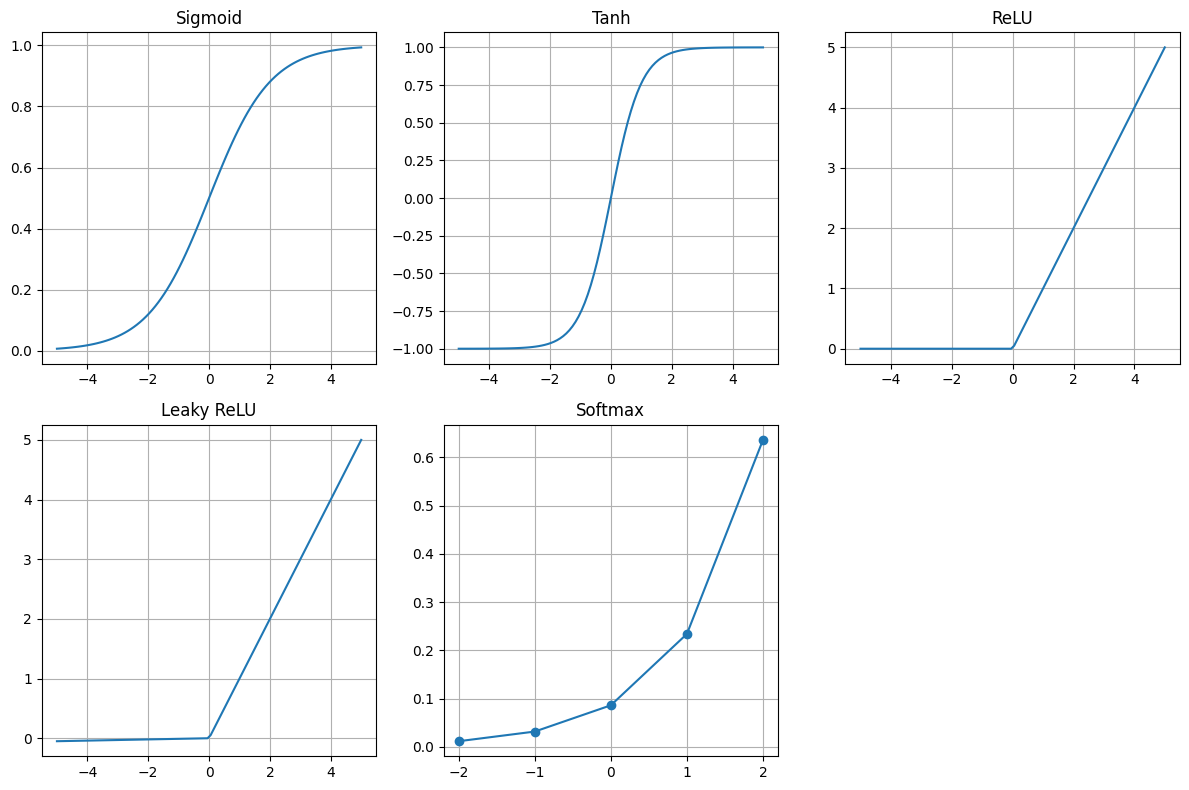

Sigmoid: [0.11920292 0.26894142 0.5        0.73105858 0.88079708]
Tanh: [-0.96402758 -0.76159416  0.          0.76159416  0.96402758]
ReLU: [0 0 0 1 2]
Leaky ReLU: [-0.02 -0.01  0.    1.    2.  ]
Softmax: [0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]
Adjusted Learning Rate: 0.08333333333333334


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Stability improvement
    return exp_x / np.sum(exp_x)

def adjust_learning_rate(initial_lr, epoch, decay_rate=0.1, decay_epoch=10):
    return initial_lr * (1 / (1 + decay_rate * (epoch // decay_epoch)))

# input values
x = np.linspace(-5, 5, 100)

# Plot activation functions
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

functions = [(sigmoid, "Sigmoid"), (tanh, "Tanh"), (relu, "ReLU"), (leaky_relu, "Leaky ReLU")]

for i, (func, title) in enumerate(functions):
    y = func(x)
    axes[i].plot(x, y)
    axes[i].set_title(title)
    axes[i].grid()

# Softmax applied to vectors
x_softmax = np.linspace(-2, 2, 5)  
y_softmax = softmax(x_softmax)
axes[4].plot(x_softmax, y_softmax, marker='o')
axes[4].set_title("Softmax")
axes[4].grid()
# Hide the last empty subplot
axes[5].axis("off")
plt.tight_layout()
plt.show()
x_sample = np.array([-2, -1, 0, 1, 2])
print("Sigmoid:", sigmoid(x_sample))
print("Tanh:", tanh(x_sample))
print("ReLU:", relu(x_sample))
print("Leaky ReLU:", leaky_relu(x_sample))
print("Softmax:", softmax(x_sample))

# training rate adjustment
initial_lr = 0.1
epoch = 20
print("Adjusted Learning Rate:", adjust_learning_rate(initial_lr, epoch))

---

# Program 2

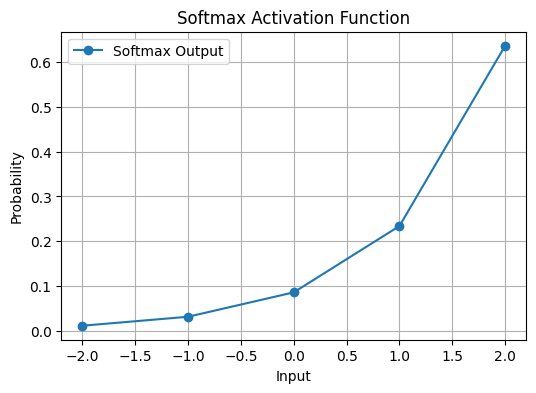

Predicted Probabilities: [[0.0277276  0.18538383 0.0681989 ]
 [0.02386537 0.22642832 0.07923582]
 [0.02054111 0.27656017 0.09205888]]
Categorical Cross-Entropy Loss: 2.601993529806192
Gradient of Loss: [[-0.04651307  0.00260489 -0.05429432]
 [-0.07744193 -0.0077827  -0.07964453]]
Adjusted Learning Rate: 0.08333333333333334


In [2]:
#Program 2: Implement Categorical cross entropy Loss function with forward and backward pass
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Stability improvement
    return exp_x / np.sum(exp_x)

def categorical_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-12, 1. - 1e-12)  # Avoid log(0)
    return -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]

def categorical_cross_entropy_derivative(y_true, y_pred):
    return y_pred - y_true

def adjust_learning_rate(initial_lr, epoch, decay_rate=0.1, decay_epoch=10):
    return initial_lr * (1 / (1 + decay_rate * (epoch // decay_epoch)))

def forward_pass(X, weights):
    logits = np.dot(X, weights)
    y_pred = softmax(logits)
    return y_pred

def backward_pass(X, y_true, y_pred, learning_rate):
    gradient = categorical_cross_entropy_derivative(y_true, y_pred)
    weights_update = np.dot(X.T, gradient) / X.shape[0]
    return weights_update * learning_rate

# softmax input
x_softmax = np.array([-2, -1, 0, 1, 2])
y_softmax = softmax(x_softmax)
# Plot Softmax 
plt.figure(figsize=(6, 4))
plt.plot(x_softmax, y_softmax, marker='o', label='Softmax Output')
plt.title("Softmax Activation Function")
plt.xlabel("Input")
plt.ylabel("Probability")
plt.grid()
plt.legend()
plt.show()
# Input features
X_sample = np.array([[1.0, 2.0], [1.5, 2.5], [2.0, 3.0]]) 
#weights
weights = np.array([[0.2, -0.3, 0.5], [-0.5, 0.7, -0.2]])
# One-hot encoded labels
y_true = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 1]]) 
# Forward pass
y_pred = forward_pass(X_sample, weights)
loss = categorical_cross_entropy(y_true, y_pred)
# Backward pass
learning_rate = 0.1
weight_update = backward_pass(X_sample, y_true, y_pred, learning_rate)
print("Predicted Probabilities:", y_pred)
print("Categorical Cross-Entropy Loss:", loss)
print("Gradient of Loss:", weight_update)
# Adjust learning rate
initial_lr = 0.1
epoch = 20
print("Adjusted Learning Rate:", adjust_learning_rate(initial_lr, epoch))

---

# Program 3

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Stability improvement
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def categorical_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-12, 1. - 1e-12)  # avoid log(0)
    return -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]

def categorical_cross_entropy_derivative(y_true, y_pred):
    return y_pred - y_true

# Simple ANN with one hidden layer
class SimpleANN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))

    def forward_pass(self, X):
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = relu(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.y_pred = softmax(self.output_layer_input)
        return self.y_pred


    def backward_pass(self, X, y_true):
        loss_derivative = categorical_cross_entropy_derivative(y_true, self.y_pred)
        d_weights_hidden_output = np.dot(self.hidden_layer_output.T, loss_derivative) / X.shape[0]
        d_bias_output = np.sum(loss_derivative, axis=0, keepdims=True) / X.shape[0]

        hidden_layer_error = np.dot(loss_derivative, self.weights_hidden_output.T) * relu_derivative(self.hidden_layer_input)
        d_weights_input_hidden = np.dot(X.T, hidden_layer_error) / X.shape[0]
        d_bias_hidden = np.sum(hidden_layer_error, axis=0, keepdims=True) / X.shape[0]

        self.weights_hidden_output -= self.learning_rate * d_weights_hidden_output
        self.bias_output -= self.learning_rate * d_bias_output
        self.weights_input_hidden -= self.learning_rate * d_weights_input_hidden
        self.bias_hidden -= self.learning_rate * d_bias_hidden

    def train(self, X, y_true, epochs=100):
        for epoch in range(epochs):
            y_pred = self.forward_pass(X)
            self.backward_pass(X, y_true)
            if epoch % 10 == 0:
                loss = categorical_cross_entropy(y_true, y_pred)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

#data
X_sample = np.array([[0.5, 1.5], [1.0, 2.0], [1.5, 2.5]])
y_true = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
ann = SimpleANN(input_size=2, hidden_size=4, output_size=3, learning_rate=0.1)
ann.train(X_sample, y_true, epochs=100)

Epoch 0, Loss: 1.0986
Epoch 10, Loss: 1.0986
Epoch 20, Loss: 1.0986
Epoch 30, Loss: 1.0986
Epoch 40, Loss: 1.0986
Epoch 50, Loss: 1.0986
Epoch 60, Loss: 1.0986
Epoch 70, Loss: 1.0986
Epoch 80, Loss: 1.0986
Epoch 90, Loss: 1.0986
